In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np

import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker
import matplotlib

import corner 
# matplotlib.use('TkAgg')
%matplotlib inline

In [2]:
dir_name = '/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/'

roots = [
         'NLEDCosmology_phy_Pantheon+CBAO_mcmc',
  ]

roots2 = [
         'NLED2Cosmology_phy_Pantheon+CBAO_mcmc',
  ]
# 
# roots_bao = ['NLED_phy_CBAO_nested_multi', 'NLED_phy_HD+SN+CBAO_nested_multi']




In [12]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.8,
                                             'smooth_scale_1D': 0.8, 
                                             'ignore_rows': 0.2})

<Figure size 720x648 with 0 Axes>

/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLEDCosmology_phy_Pantheon+CBAO_mcmc_1.txt
Removed 0.2 as burn in


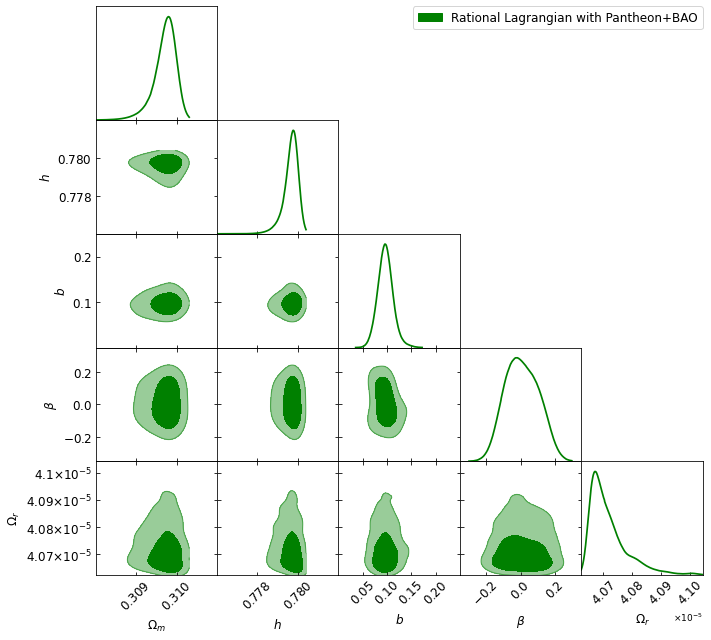

In [13]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots, ['Om','h', 'b', 'beta', 'Omrad'],               
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['green', 'blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['Rational Lagrangian with Pantheon+BAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
                param_limits={'b': [0.0, 0.25], 'beta':[-0.35, 0.35], 'h': [0.776, 0.782],
                             'Om':[0.308, 0.311]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_Pantheon_BAO_racional.png', dpi=300)

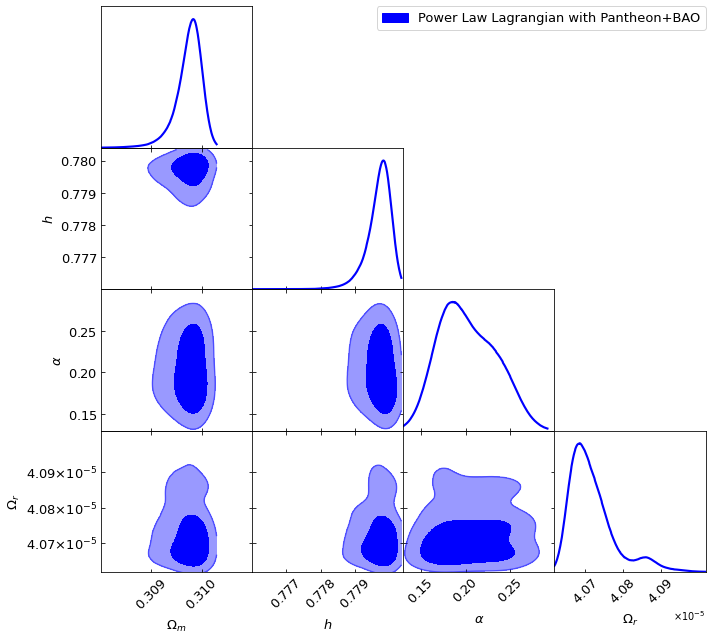

In [19]:
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','h', 'alfa', 'Omrad'],               
                diag1d_kwargs={'colors':['blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['Power Law Lagrangian with Pantheon+BAO'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
                param_limits={'alfa': [0.13, 0.3], 'h': [0.776, 0.7804], 'Om':[0.308, 0.311]},                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_Pantheon_BAO_power_law.png', dpi=300)

In [6]:
import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains

In [12]:
def eos_powerlaw(z, params):
    alfa = params
    a = z/(1+z)
    gamma = 1 
    num = 16*alfa*gamma*a**(4-4*alfa)+4
    den = 12*gamma*a**(4-4*alfa)+3
    return -1 + num/den

In [13]:
cmap_reversed = matplotlib.cm.get_cmap('Blues_r')

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

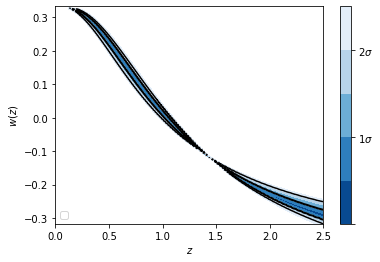

In [30]:
file_root = dir_name + 'NLED2Cosmology_phy_Pantheon+CBAO_mcmc'

samples, weights = samples_from_getdist_chains(['alfa'], file_root)

k = np.linspace(0, 2.5, 1000)

cbar = plot_contours(eos_powerlaw, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2, 1.5])

cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

# plt.hlines(-1, xmin=0, xmax=10, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)

plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
# plt.ylim(0.333335,0.333335)

# plt.tight_layout()
plt.yticks()

plt.legend(loc='lower left')
# plt.text(0,-1.6, 'CC+JLA+$f\sigma_8$', fontsize=13)
plt.savefig('NLED_power_law_EoS.png', dpi=200)


In [15]:
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

In [16]:
def eos_rational(z, params):
    b, beta = params
    num = 4*z**2+(4-24*b)*z+4*b+1
    den = 12*z**2+(12+24*b)*z+12*b+3
    return num/den

/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/NLEDCosmology_phy_Pantheon+CBAO_mcmc_1.txt
Removed no burn in


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

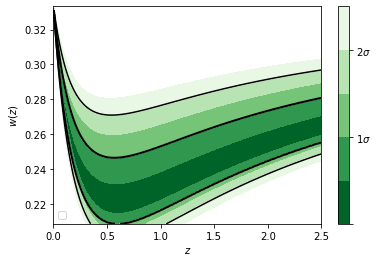

In [17]:
file_root = dir_name + 'NLEDCosmology_phy_Pantheon+CBAO_mcmc'

samples, weights = samples_from_getdist_chains(['b', 'beta'], file_root)

k = np.linspace(0, 2.5, 1000)

cbar = plot_contours(eos_rational, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])

cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

# plt.hlines(-1, xmin=0, xmax=10, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)

plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
# plt.ylim(0.20,0.33)

# plt.tight_layout()
plt.yticks()

plt.legend(loc='lower left')
# plt.text(0,-1.6, 'CC+JLA+$f\sigma_8$', fontsize=13)
plt.savefig('NLED_rational_EoS.png', dpi=200)
